## 🌐 Connect Colab to Google Drive

In [14]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/My Drive/[2024-2025] AN2DL/Homework 1

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/[2024-2025] AN2DL/Homework 1


## ⚙️ Import Libraries

In [15]:
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
tf.random.set_seed(42);

## Help Functions

In [16]:
def show_image_by_index(image):
    plt.figure(figsize=(6, 6))
    plt.imshow(image.astype("uint8"))
    plt.axis('off')
    plt.show()

def remove_duplicate_images_from_dataset(dataset, image_indices):
    images = dataset['images']
    labels = dataset['labels']

    indices_to_remove = set()

    for image_index in image_indices:
        image_to_remove = images[image_index]
        duplicates = [i for i in range(len(images)) if np.array_equal(images[i], image_to_remove)]
        indices_to_remove.update(duplicates)

    print(f"Numero di immagini da rimuovere: {len(indices_to_remove)}")

    new_images = np.delete(images, list(indices_to_remove), axis=0)
    new_labels = np.delete(labels, list(indices_to_remove), axis=0)
    new_dataset = {
        'images': new_images,
        'labels': new_labels
    }
    return new_dataset

def save_dataset_to_npz(dataset, filename):
  np.savez(filename, images=dataset['images'], labels=dataset['labels'])



def display_images_by_indices(images, indices):
    """
    This function displays the images at the specified indices from the dataset in a small grid (e.g., 10x10).

    Parameters:
    images (numpy.ndarray): The dataset of images (shape: [num_images, height, width, channels]).
    indices (list or numpy.ndarray): The indices of the images to be displayed.

    Returns:
    None
    """

    # Step 1: Calculate the number of images to display
    num_images = len(indices)

    # Step 2: Set up a grid of subplots to display the images
    num_cols = 10  # Display 10 images per row
    num_rows = (num_images // num_cols) + (1 if num_images % num_cols != 0 else 0)  # Calculate rows required

    # Step 3: Create the figure with a smaller size for 10x10 grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 1.2))  # Adjust size for smaller images

    # Step 4: Loop through the indices and display the images
    for i, idx in enumerate(indices):
        # Calculate the row and column for the current image
        row = i // num_cols
        col = i % num_cols

        # Get the image corresponding to the index
        img = images[idx]

        # Display the image
        ax = axes[row, col] if num_rows > 1 else axes[col]
        ax.imshow(img)
        ax.axis('off')  # Turn off axis labels

        # Optionally, add the index as a label
        ax.set_title(f"Image {idx}")

    # Hide any unused axes (if the number of images doesn't fill all grid spots)
    for j in range(num_images, num_rows * num_cols):
        axes.flatten()[j].axis('off')

    # Step 5: Display the plot
    plt.tight_layout()
    plt.show()





import hashlib

def find_duplicate_images(images):
    """
    This function finds duplicate images in a dataset and returns the indices of the duplicates.
    For each duplicate, the index of the first occurrence is returned.

    Parameters:
    images (numpy.ndarray): The dataset of images (shape: [num_images, height, width, channels]).

    Returns:
    list: A list of indices for the duplicates. For each duplicate, the index of the first occurrence is returned.
    """
    seen_images = {}  # Dictionary to store the hashes of images
    duplicate_indices = []

    # Step 1: Loop through the images and check for duplicates
    for i, img in enumerate(images):
        # Convert the image to a hashable form (using a hash function like MD5)
        img_hash = hashlib.md5(img.tobytes()).hexdigest()  # Create a hash of the image

        # Step 2: Check if the hash has been seen before
        if img_hash in seen_images:
            # If the image hash has been seen before, it's a duplicate
            duplicate_indices.append(seen_images[img_hash])
        else:
            # If the image is new, store its hash and index
            seen_images[img_hash] = i

    return duplicate_indices






# Load the Data

In [17]:
data = np.load('training_set.npz')

#Initial look

In [18]:
print(f"Images shape: {data['images'].shape}")
print(f"Labels shape: {data['labels'].shape}")

Images shape: (13759, 96, 96, 3)
Labels shape: (13759, 1)


#Find outliers

In [19]:
#Try to find images that appears to be replicated
array_of_indexes = find_duplicate_images(data['images'])
array_of_indexes = np.unique(array_of_indexes)
print(len(array_of_indexes))
print(array_of_indexes)


10
[  120   810  1074  3052  3328  5466  7953  8117 11959 13559]


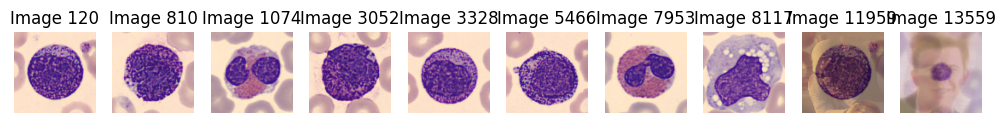

In [20]:
display_images_by_indices(data['images'], array_of_indexes)

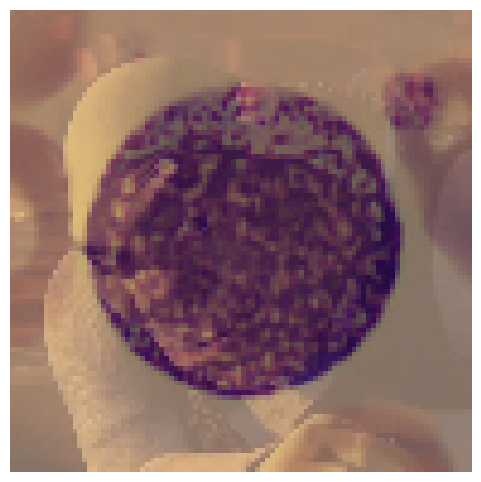

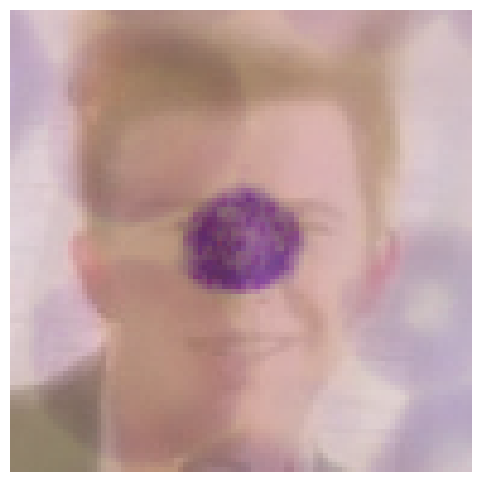

In [21]:
#Admire the outliers
show_image_by_index(data["images"][11959])
show_image_by_index(data["images"][13559])

#Removing outliers

In [22]:
print(data['images'].shape)
data = remove_duplicate_images_from_dataset(data, [11959, 13559])
print(data['images'].shape)

(13759, 96, 96, 3)
Numero di immagini da rimuovere: 1800
(11959, 96, 96, 3)


# Export Dataset

In [23]:
save_dataset_to_npz(data, "training_set_without_outlier.npz")